In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
df = pd.read_csv(r'spotify_song_popularity.csv')
df.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity
0,0.374540,0.698162,-48.892024,0.519082,0.261706,0.827519,0.672703,0.286520,140.079423,274536,50.287603
1,0.950714,0.536096,-27.485943,0.479182,0.246979,0.764528,0.796681,0.802640,172.760526,171137,74.963392
2,0.731994,0.309528,-7.623250,0.025642,0.906255,0.573529,0.250468,0.997238,166.422530,281304,73.185630
3,0.598658,0.813795,-16.066507,0.341248,0.249546,0.956047,0.624874,0.030026,81.545987,181497,57.933435
4,0.156019,0.684731,-11.606331,0.380196,0.271950,0.200475,0.571746,0.897366,80.894926,220485,51.896440


In [6]:
df.shape

(500, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      500 non-null    float64
 1   energy            500 non-null    float64
 2   loudness          500 non-null    float64
 3   speechiness       500 non-null    float64
 4   acousticness      500 non-null    float64
 5   instrumentalness  500 non-null    float64
 6   liveness          500 non-null    float64
 7   valence           500 non-null    float64
 8   tempo             500 non-null    float64
 9   duration_ms       500 non-null    int64  
 10  popularity        500 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 43.1 KB


In [8]:
df.describe

<bound method NDFrame.describe of      danceability    energy   loudness  speechiness  acousticness  \
0        0.374540  0.698162 -48.892024     0.519082      0.261706   
1        0.950714  0.536096 -27.485943     0.479182      0.246979   
2        0.731994  0.309528  -7.623250     0.025642      0.906255   
3        0.598658  0.813795 -16.066507     0.341248      0.249546   
4        0.156019  0.684731 -11.606331     0.380196      0.271950   
..            ...       ...        ...          ...           ...   
495      0.353352  0.091582 -19.907232     0.656955      0.492325   
496      0.583656  0.917314 -22.830579     0.956615      0.577279   
497      0.077735  0.136819 -32.190357     0.068958      0.865577   
498      0.974395  0.950237 -37.212853     0.057055      0.980739   
499      0.986211  0.446006  -8.199981     0.282187      0.407584   

     instrumentalness  liveness   valence       tempo  duration_ms  popularity  
0            0.827519  0.672703  0.286520  140.079423   

In [9]:
df.isnull().sum()

danceability        0
energy              0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
popularity          0
dtype: int64

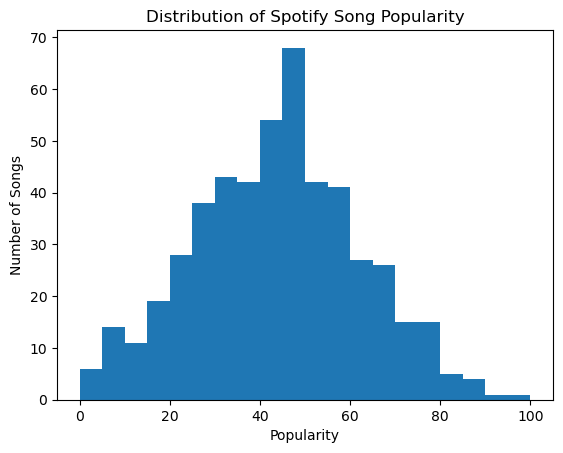

In [10]:
plt.hist(df['popularity'], bins=20)
plt.xlabel("Popularity")
plt.ylabel("Number of Songs")
plt.title("Distribution of Spotify Song Popularity")
plt.show()


In [11]:
df.corr()['popularity'].sort_values(ascending=False)


popularity          1.000000
energy              0.575089
danceability        0.552477
valence             0.313365
tempo               0.075162
loudness            0.032596
instrumentalness    0.016779
liveness            0.004016
speechiness        -0.002906
acousticness       -0.003175
duration_ms        -0.028496
Name: popularity, dtype: float64

In [19]:
features = ['danceability', 'energy', 'loudness', 'valence', 'tempo']
x = df[features]
y = df['popularity']


In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [21]:
model = LinearRegression()
model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [22]:
y_pred = model.predict(x_test)

In [23]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 8.037661251908366
MSE: 96.5962612730499
RMSE: 9.828339700735313
R2 Score: 0.7321748323694273
